# Customer Segmentation


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (10.0, 8.0)

np.random.seed(42)

In [ ]:
data = pd.read_csv("marketing_campaign.csv", sep="\t")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## Exploratory Data Analysis

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

There are 4 missing values in Income variable.

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


From the statistics, we know there are anomalies in the Year_Birth and Income variables. Let's plot them.

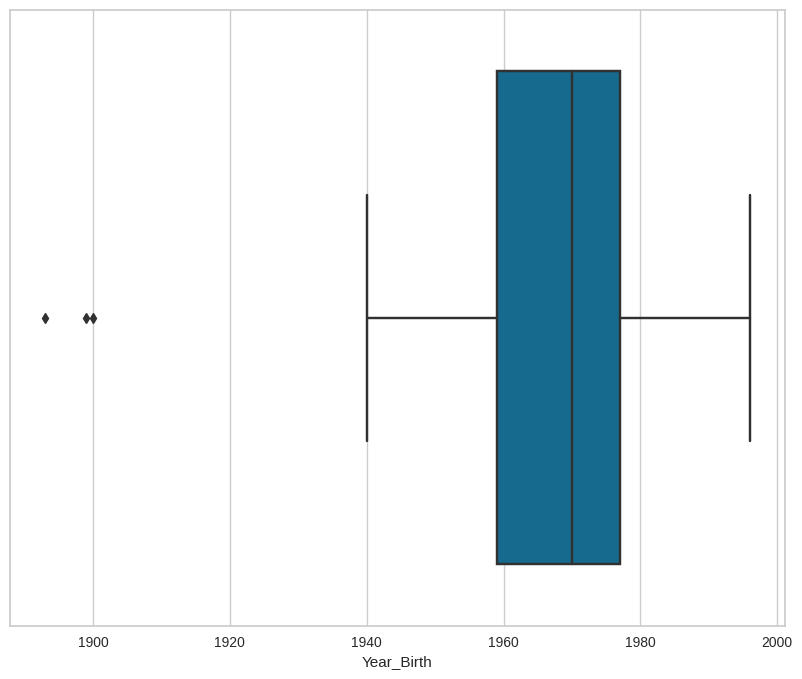

In [ ]:
sns.boxplot(data=data, x='Year_Birth');

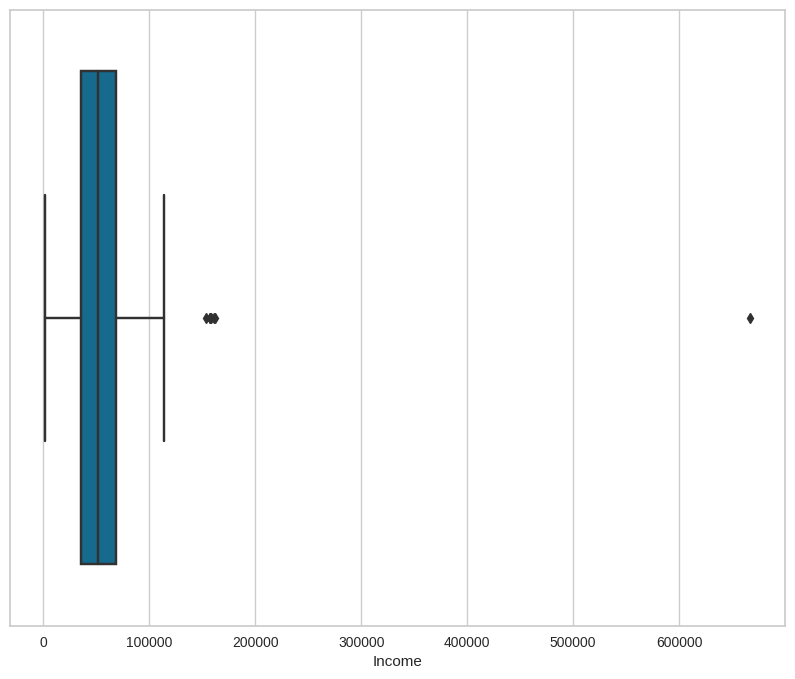

In [ ]:
sns.boxplot(data=data, x='Income');

## Data Preprocessing

Considering there are only 4 missing values in the Income variable, we'll drop these values.

In [ ]:
data = data.dropna()
data.shape

(2216, 29)

We'll also drop the outliers found in Year_Birth and Income variables.

In [ ]:
data = data[(data["Year_Birth"] > 1920)]
data = data[(data["Income"] < 600000)]
data.shape

(2212, 29)

Next, we'll do feature engineering to some of these variables.

In [ ]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], format='%d-%m-%Y')

reference_date = pd.to_datetime('01-01-2015')
data['Customer_For'] = (reference_date - data["Dt_Customer"]).dt.days

data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,849
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,299
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,498
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,325
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,347


In [ ]:
data["Education"].value_counts()

Graduation    1115
PhD            480
Master         365
2n Cycle       198
Basic           54
Name: Education, dtype: int64

In [ ]:
data["Marital_Status"].value_counts()

Married     857
Together    571
Single      470
Divorced    231
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [ ]:
data["Age"] = 2015 - data["Year_Birth"]

data["Education"] = data["Education"].replace({"Basic": "Undergraduate","2n Cycle": "Undergraduate",
                                               "Graduation": "Graduate", "Master": "Postgraduate", "PhD": "Postgraduate"})

data["Living_With"] = data["Marital_Status"].replace({"Married": "Partner", "Together": "Partner",
                                                      "Single": "Alone", "Divorced": "Alone", "Widow": "Alone", "Absurd": "Alone", "YOLO": "Alone"})

data["Children"] = data["Kidhome"] + data["Teenhome"]
data["Family_Size"] = data["Living_With"].replace({"Alone":  1, "Partner": 2}) + data["Children"]
data["Is_Parent"] = np.where(data.Children > 0, 1, 0)

data.rename(columns={"MntWines": "Wines", "MntFruits": "Fruits", "MntMeatProducts": "Meat",
                     "MntFishProducts": "Fish", "MntSweetProducts": "Sweet", "MntGoldProds": "Gold"}, inplace=True)
data["Spent"] = data["Wines"] + data["Fruits"] + data["Meat"] + data["Fish"] + data["Sweet"] + data["Gold"]

data.drop(["ID", "Year_Birth", "Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue"], axis=1, inplace=True)

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2212.0,51958.810579,21527.278844,1730.0,35233.5,51371.0,68487.00,162397.0
Kidhome,2212.0,0.441682,0.536955,0.0,0.0,0.0,1.00,2.0
Teenhome,2212.0,0.505877,0.544253,0.0,0.0,0.0,1.00,2.0
Recency,2212.0,49.019439,28.943121,0.0,24.0,49.0,74.00,99.0
Wines,2212.0,305.287523,337.322940,0.0,24.0,175.5,505.00,1493.0
Fruits,2212.0,26.329566,39.744052,0.0,2.0,8.0,33.00,199.0
Meat,2212.0,167.029837,224.254493,0.0,16.0,68.0,232.25,1725.0
Fish,2212.0,37.648734,54.772033,0.0,3.0,12.0,50.00,259.0
Sweet,2212.0,27.046564,41.090991,0.0,1.0,8.0,33.00,262.0
Gold,2212.0,43.925859,51.706981,0.0,9.0,24.5,56.00,321.0


Some of these variables are categorical, so we're going to convert it to numerical using LabelEncoder.

In [ ]:
cat_cols = data.select_dtypes(exclude=np.number).columns

le = LabelEncoder()
for col in cat_cols:
    data[col] = data[[col]].apply(le.fit_transform)

data.dtypes

Education                int64
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
Wines                    int64
Fruits                   int64
Meat                     int64
Fish                     int64
Sweet                    int64
Gold                     int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
Customer_For             int64
Age                      int64
Living_With              int64
Children                 int64
Family_Size              int64
Is_Parent                int64
Spent                    int64
dtype: object

Next, we'll transform the data using StandardScaler.

In [ ]:
data_clean = data.copy()

data_clean.drop(['AcceptedCmp1','AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response'], axis=1, inplace=True)

scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data_clean), columns= data_clean.columns)

scaled_data.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweet,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Living_With,Children,Family_Size,Is_Parent,Spent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.527721,1.018352,-1.349603,-1.264598,-1.758359,-1.581139,1.676245
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.189011,1.274785,-1.349603,1.404572,0.449070,0.632456,-0.963297
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.206048,0.334530,0.740959,-1.264598,-0.654644,-1.581139,0.280110
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.060584,-1.289547,0.740959,0.069987,0.449070,0.632456,-0.920135
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.951915,-1.033114,0.740959,0.069987,0.449070,0.632456,-0.307562


## Dimensionality Reduction

We utilize PCA for dimensionality reduction, preserving 90% of the information in our data.

In [ ]:
pca = PCA(0.9).fit(scaled_data)
pca.n_components_

13

In [ ]:
pca = PCA(n_components=13)
pca_data = pd.DataFrame(pca.fit_transform(scaled_data))
pca_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,4.986336,-0.161514,2.445404,-0.177913,1.083962,-0.429361,-0.534847,-0.938668,1.677356,0.710470,1.160627,-0.659798,1.286830
1,-2.874168,0.022697,-1.530795,-1.401983,1.746657,0.577842,-0.052888,-0.023230,0.951744,0.385365,0.147589,-0.470897,0.080074
2,2.615763,-0.731421,-0.264422,-0.040475,-0.667034,0.540032,-1.604257,0.006577,-0.792525,-0.620994,0.922259,-0.280382,-1.049834
3,-2.654568,-1.455878,-0.398370,1.295816,0.316219,0.877627,-0.714779,0.870155,-0.661891,-0.091184,0.356707,0.092676,-0.218644
4,-0.656015,0.177864,-0.141286,1.652892,0.259802,-0.936633,1.467383,0.563369,-0.933524,0.248417,1.352406,0.543176,-0.317992


## Clustering

Using K-Elbow method, we're gonna find the best number of cluster that can be formed from our data.

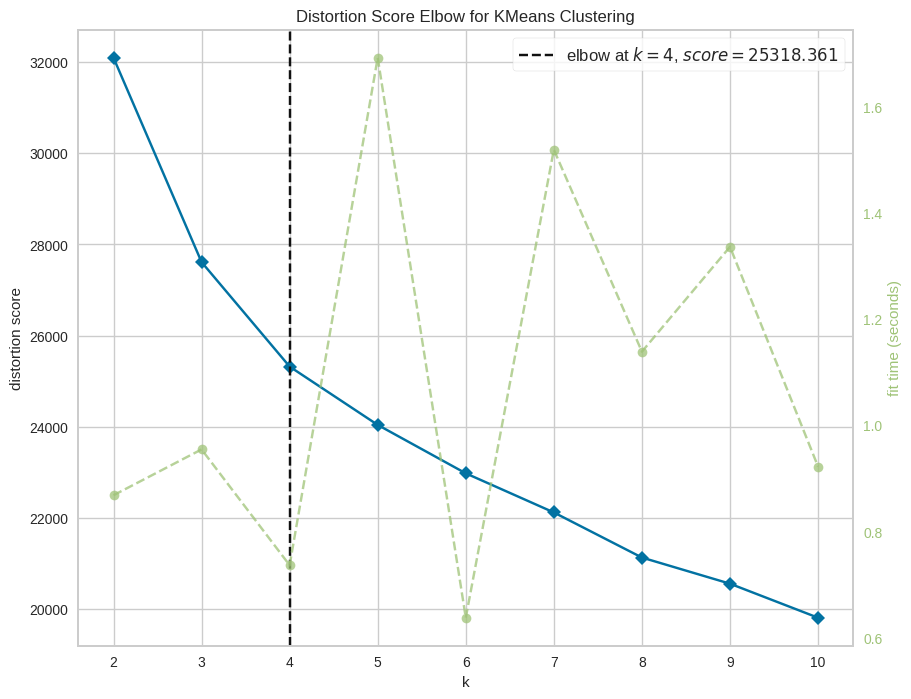

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
elbow = KElbowVisualizer(KMeans(n_init=10), k=10)
elbow.fit(pca_data)
elbow.show()

The result shows that 4 is the best number of clusters.

Now, let's do the clustering.

In [ ]:
model = KMeans(n_init=10, n_clusters=4)
y_pred = model.fit_predict(pca_data)
data["Clusters"]= y_pred

## Evaluation

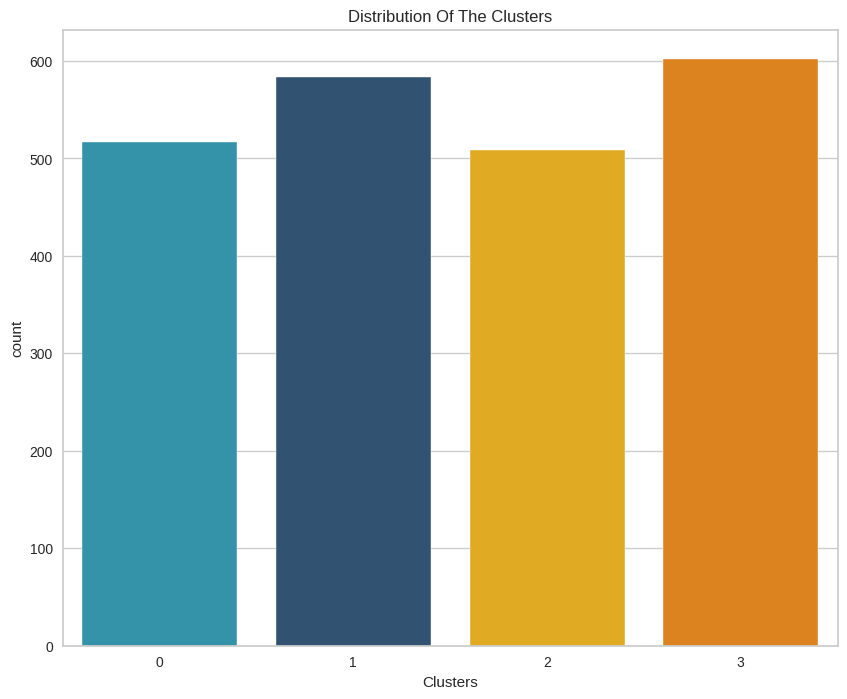

In [ ]:
palette = ['#219EBC', '#26547C', '#FFB703', '#FB8500']
sns.countplot(data=data, x="Clusters", palette=palette)
plt.title("Distribution Of The Clusters");

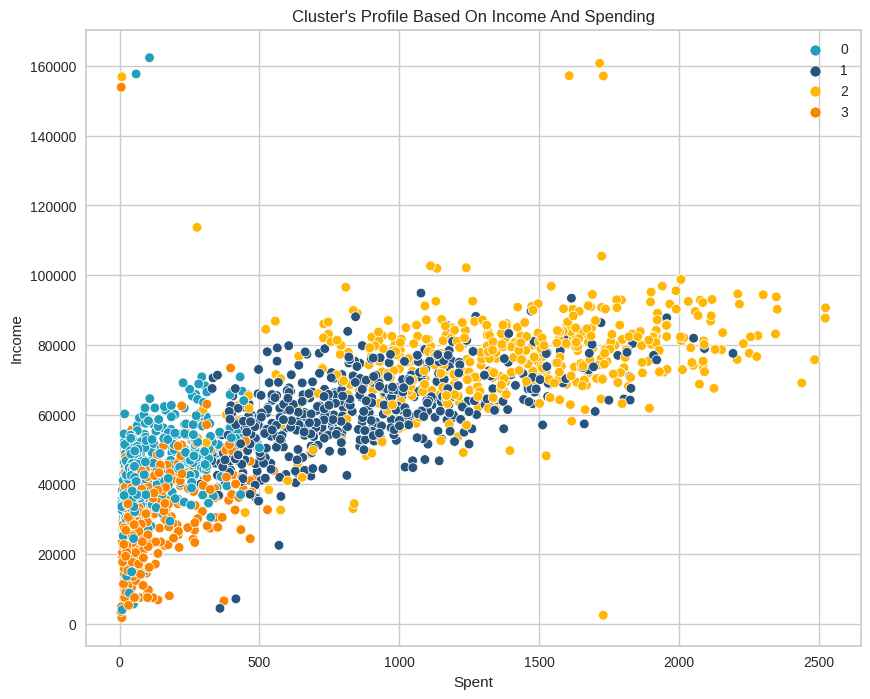

In [ ]:
sns.scatterplot(data=data, x="Spent", y="Income", hue="Clusters", palette=palette)
plt.title("Cluster's Profile Based On Income And Spending")
plt.legend();

The plot shows the clusters pattern:
- Cluster 0, Low Spent, Average Income.
- Cluster 1, Average Spent, Average Income.
- Cluster 2, High Spent, High Income.
- Cluster 3, Low Spent, Low Income.

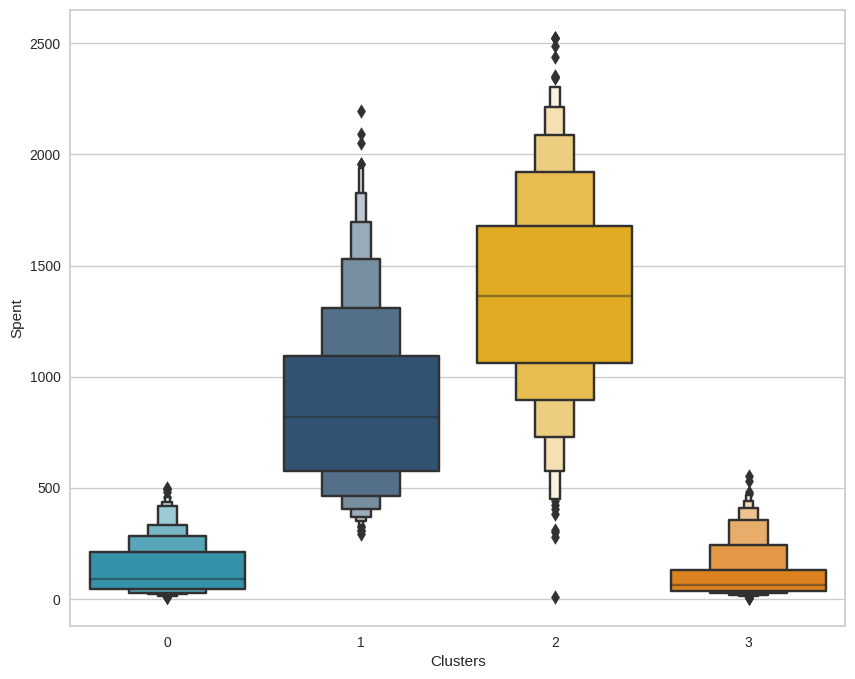

In [ ]:
sns.boxenplot(x=data["Clusters"], y=data["Spent"], palette=palette);

Cluster 1 and 2 are the star customers.

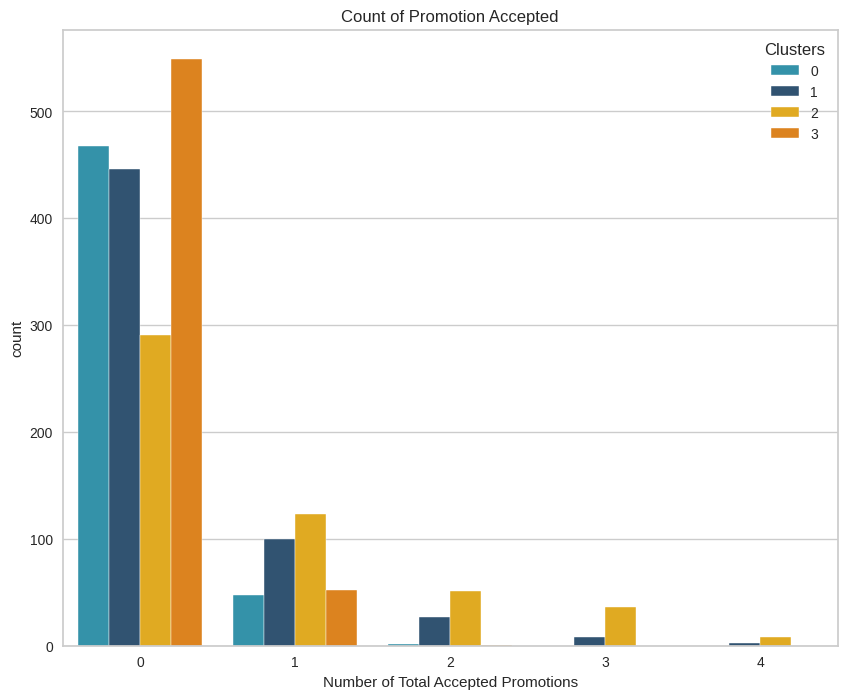

In [ ]:
data["Total_Promos"] = data["AcceptedCmp1"] + data["AcceptedCmp2"] + data["AcceptedCmp3"] + data["AcceptedCmp4"] + data["AcceptedCmp5"]

sns.countplot(x=data["Total_Promos"], hue=data["Clusters"], palette=palette)
plt.title("Count of Promotion Accepted")
plt.xlabel("Number of Total Accepted Promotions");

Cluster 1 and 2 also partake in all 5 of the campaigns. But overall, the campaigns didn't seem to work well. Very few participants in the last four campaigns.

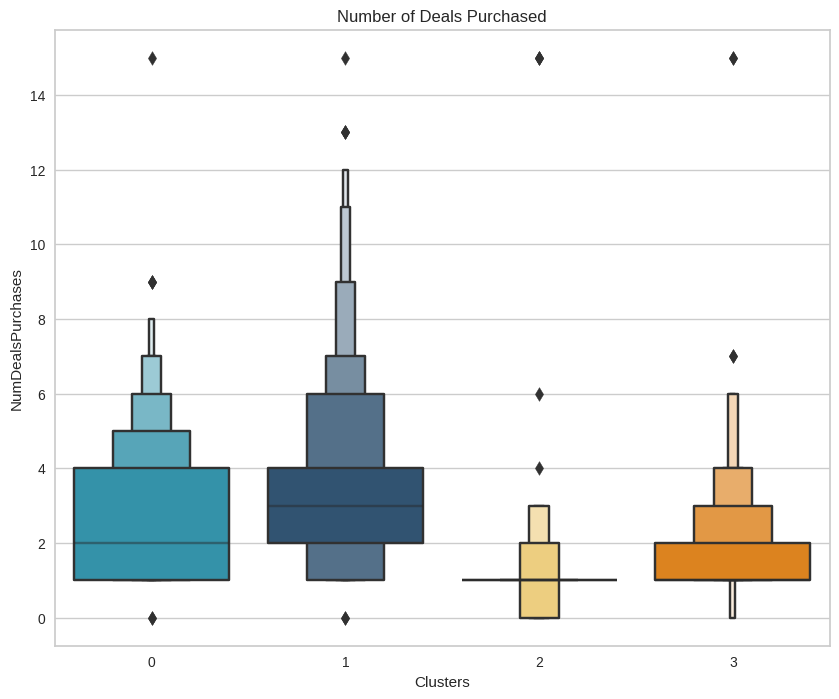

In [ ]:
sns.boxenplot(x=data["Clusters"], y=data["NumDealsPurchases"], palette=palette)
plt.title("Number of Deals Purchased");

Unlike campaigns, the offered deals did very well, especially for cluster 0 and 1. However, cluster 2, the star customer, is not much into the deal.

## Profiling

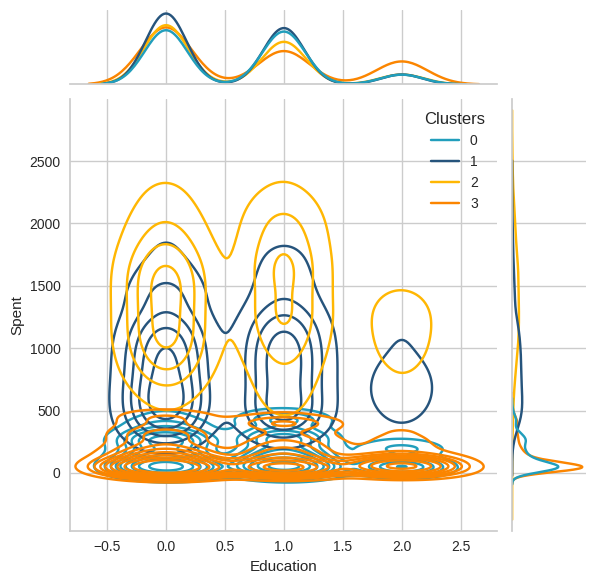

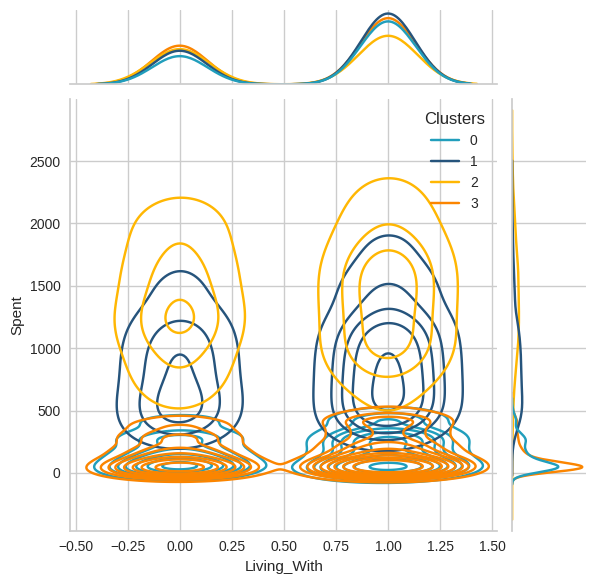

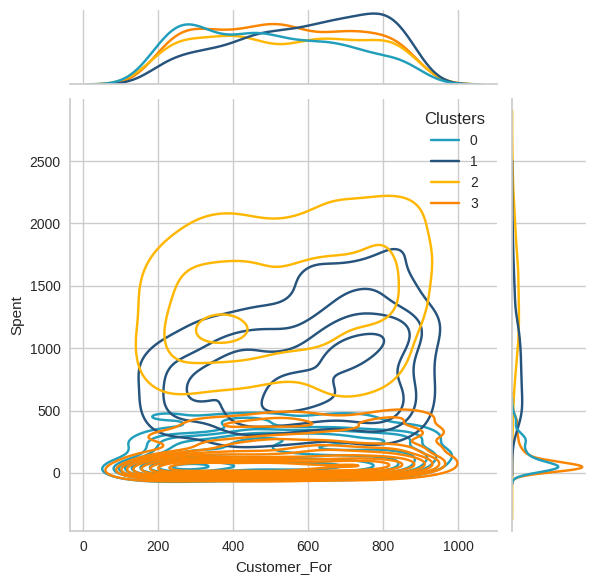

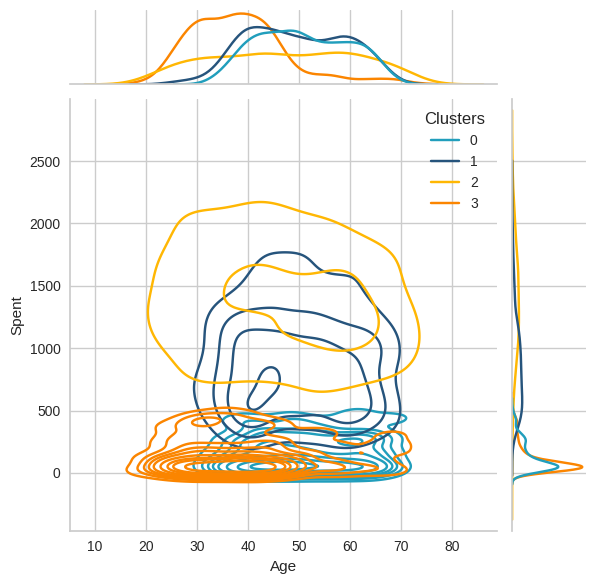

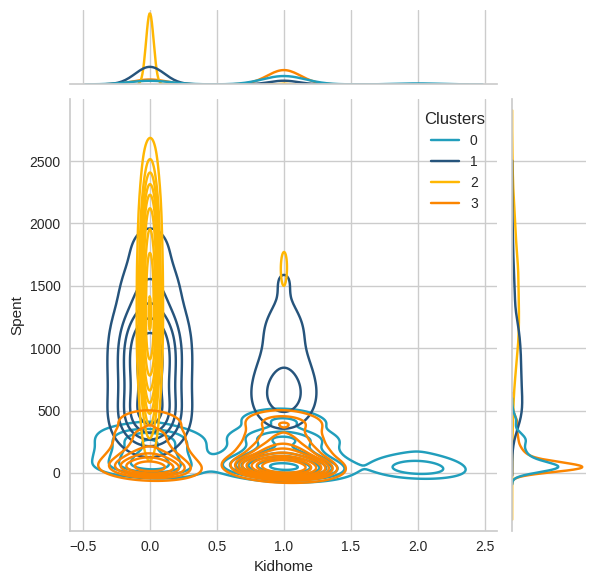

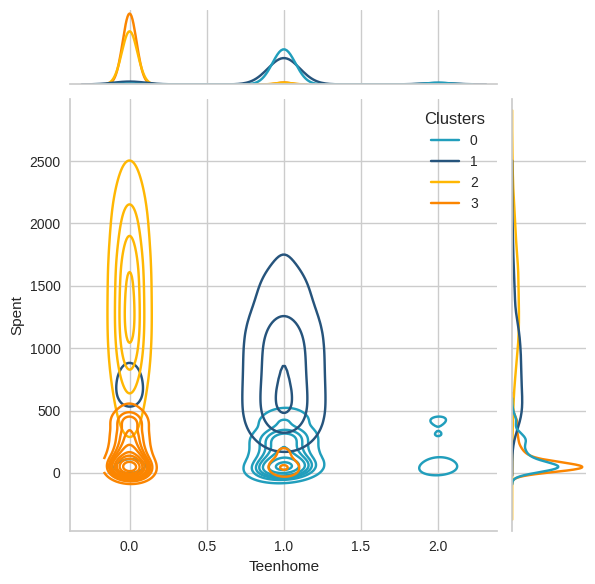

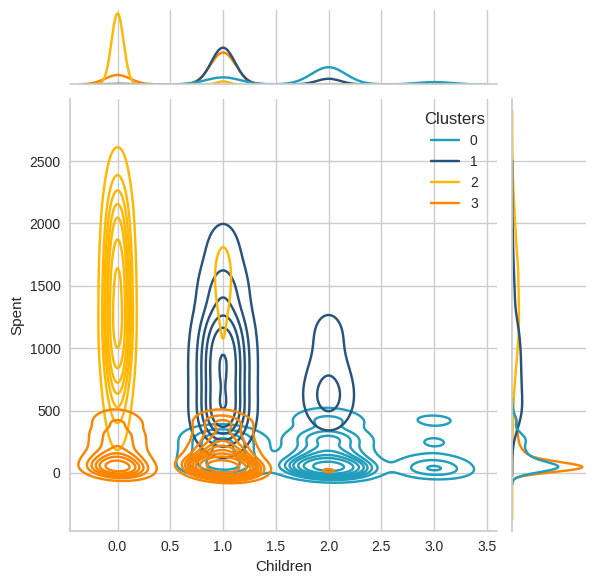

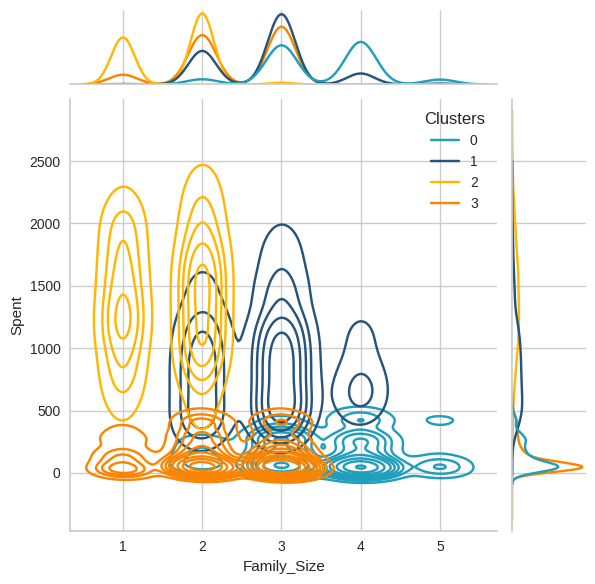

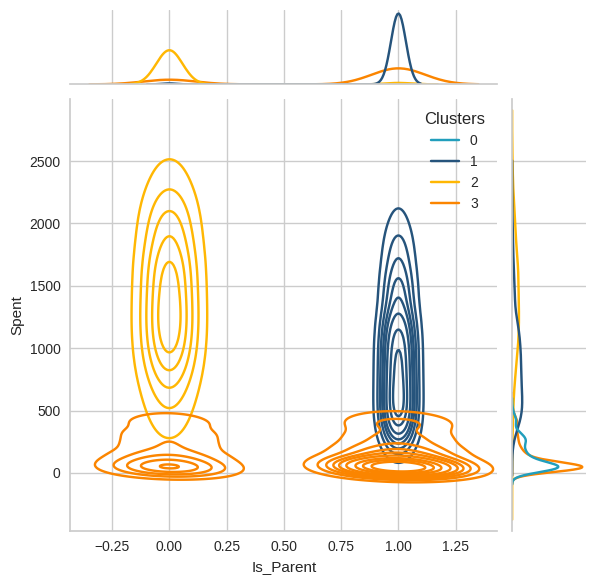

In [ ]:
personal = ["Education", "Living_With", "Customer_For", "Age", "Kidhome", "Teenhome", "Children", "Family_Size", "Is_Parent"]

for var in personal:
    sns.jointplot(x=data[var], y=data["Spent"], hue=data["Clusters"], kind="kde", palette=palette);

Based on the plots, we can get some information about the customers in different clusters:

Cluster 0
- Relatively older
- Parents
- 2-5 members in the family
- Have at max 3 childrens

Cluster 1
- Relatively older
- Parents
- 2-4 members in the family
- Have at max 2 childrens, mostly teens

Cluster 2
- Span all ages
- Not parents
- Single or married couple

Cluster 3
- Relatively younger
- Majority are parents
- At max 3 members in the family
- Majority have one child, mostly kids